# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications.

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below.

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [4]:
# Imports here
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import torch.nn.functional as F
from collections import OrderedDict
import time
import json
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
!git clone https://github.com/udacity/aipnd-project.git
%cd /content/aipnd-project/
%pwd
!nvcc --version


Cloning into 'aipnd-project'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 59 (delta 22), reused 21 (delta 21), pack-reused 22 (from 1)
Receiving objects: 100% (59/59), 878.22 KiB | 18.69 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/aipnd-project
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [10]:
!ls /content/aipnd-project


 aipnd-project	 cat_to_name.json  'Image Classifier Project.ipynb'   predict.py   train.py
 assets		 CODEOWNERS	    LICENSE			      README.md


In [8]:
%cd /content/aipnd-project/


/content/aipnd-project


In [12]:
%cd /content/aipnd-project/
!ls


/content/aipnd-project
 aipnd-project	 cat_to_name.json  'Image Classifier Project.ipynb'   predict.py   train.py
 assets		 CODEOWNERS	    LICENSE			      README.md


In [14]:
%cd /content/aipnd-project/
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz


/content/aipnd-project
--2024-10-07 09:24:21--  https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.71.56, 54.231.226.88, 52.217.194.24, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.71.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344873452 (329M) [application/x-gzip]
Saving to: ‘flower_data.tar.gz’

flower_data.tar.gz  100%[===================>] 328.90M  37.3MB/s    in 9.6s    

2024-10-07 09:24:31 (34.3 MB/s) - ‘flower_data.tar.gz’ saved [344873452/344873452]



In [17]:
!tar -xvzf flower_data.tar.gz


Streaming output truncated to the last 5000 lines.
train/75/image_02161.jpg
train/75/image_02096.jpg
train/75/image_02181.jpg
train/75/image_02079.jpg
train/75/image_02129.jpg
train/75/image_02073.jpg
train/75/image_02162.jpg
train/75/image_02082.jpg
train/75/image_02098.jpg
train/75/image_02080.jpg
train/75/image_02150.jpg
train/75/image_02159.jpg
train/75/image_02158.jpg
train/75/image_02163.jpg
train/75/image_02160.jpg
train/75/image_02134.jpg
train/75/image_02101.jpg
train/75/image_02171.jpg
train/75/image_02117.jpg
train/75/image_02137.jpg
train/75/image_02136.jpg
train/75/image_02102.jpg
train/75/image_02146.jpg
train/75/image_02177.jpg
train/75/image_02110.jpg
train/75/image_02123.jpg
train/75/image_02105.jpg
train/75/image_02076.jpg
train/75/image_02116.jpg
train/75/image_02170.jpg
train/75/image_02132.jpg
train/75/image_02122.jpg
train/75/image_02090.jpg
train/75/image_02138.jpg
train/75/image_02097.jpg
train/75/image_02106.jpg
train/75/image_02084.jpg
train/75/image_02087.jpg

In [25]:
%pwd
!ls
!tar -xvzf flower_data.tar.gz
!ls

Streaming output truncated to the last 5000 lines.
train/75/image_02079.jpg
train/75/image_02129.jpg
train/75/image_02073.jpg
train/75/image_02162.jpg
train/75/image_02082.jpg
train/75/image_02098.jpg
train/75/image_02080.jpg
train/75/image_02150.jpg
train/75/image_02159.jpg
train/75/image_02158.jpg
train/75/image_02163.jpg
train/75/image_02160.jpg
train/75/image_02134.jpg
train/75/image_02101.jpg
train/75/image_02171.jpg
train/75/image_02117.jpg
train/75/image_02137.jpg
train/75/image_02136.jpg
train/75/image_02102.jpg
train/75/image_02146.jpg
train/75/image_02177.jpg
train/75/image_02110.jpg
train/75/image_02123.jpg
train/75/image_02105.jpg
train/75/image_02076.jpg
train/75/image_02116.jpg
train/75/image_02170.jpg
train/75/image_02132.jpg
train/75/image_02122.jpg
train/75/image_02090.jpg
train/75/image_02138.jpg
train/75/image_02097.jpg
train/75/image_02106.jpg
train/75/image_02084.jpg
train/75/image_02087.jpg
train/75/image_02120.jpg
train/75/image_02092.jpg
train/75/image_02118.jpg

In [26]:
!ls


 aipnd-project	    CODEOWNERS			      LICENSE	   test       valid
 assets		    flower_data.tar.gz		      predict.py   train
 cat_to_name.json  'Image Classifier Project.ipynb'   README.md    train.py


In [27]:
!tar -xvzf flower_data.tar.gz


Streaming output truncated to the last 5000 lines.
train/75/image_02161.jpg
train/75/image_02096.jpg
train/75/image_02181.jpg
train/75/image_02079.jpg
train/75/image_02129.jpg
train/75/image_02073.jpg
train/75/image_02162.jpg
train/75/image_02082.jpg
train/75/image_02098.jpg
train/75/image_02080.jpg
train/75/image_02150.jpg
train/75/image_02159.jpg
train/75/image_02158.jpg
train/75/image_02163.jpg
train/75/image_02160.jpg
train/75/image_02134.jpg
train/75/image_02101.jpg
train/75/image_02171.jpg
train/75/image_02117.jpg
train/75/image_02137.jpg
train/75/image_02136.jpg
train/75/image_02102.jpg
train/75/image_02146.jpg
train/75/image_02177.jpg
train/75/image_02110.jpg
train/75/image_02123.jpg
train/75/image_02105.jpg
train/75/image_02076.jpg
train/75/image_02116.jpg
train/75/image_02170.jpg
train/75/image_02132.jpg
train/75/image_02122.jpg
train/75/image_02090.jpg
train/75/image_02138.jpg
train/75/image_02097.jpg
train/75/image_02106.jpg
train/75/image_02084.jpg
train/75/image_02087.jpg

In [31]:
!pip install patool
import patoolib
!mkdir flower_data
patoolib.extract_archive("flower_data.tar.gz", outdir="flower_data")


INFO patool: Extracting flower_data.tar.gz ...
INFO:patool:Extracting flower_data.tar.gz ...
INFO patool: running /usr/bin/tar --extract --gzip --force-local --file flower_data.tar.gz --directory flower_data
INFO:patool:running /usr/bin/tar --extract --gzip --force-local --file flower_data.tar.gz --directory flower_data
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... flower_data.tar.gz extracted to `flower_data'.
INFO:patool:... flower_data.tar.gz extracted to `flower_data'.


'flower_data'

In [33]:
!ls

 aipnd-project	    CODEOWNERS		'Image Classifier Project.ipynb'   README.md   train.py
 assets		    flower_data		 LICENSE			   test        valid
 cat_to_name.json   flower_data.tar.gz	 predict.py			   train


## Load the data

Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). The data should be included alongside this notebook, otherwise you can [download it here](https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz). The dataset is split into three parts, training, validation, and testing. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. You'll also need to make sure the input data is resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks you'll use were trained on the ImageNet dataset where each color channel was normalized separately. For all three sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.


In [5]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [34]:
# TODO: Define your transforms for the training, validation, and testing sets
import torch
from torchvision import datasets, transforms

# TODO: Define the transformations for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  # Randomly crop and resize to 224x224
        transforms.RandomHorizontalFlip(),   # Randomly flip images horizontally
        transforms.ToTensor(),               # Convert image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),              # Resize the image to 256
        transforms.CenterCrop(224),         # Center crop to 224x224
        transforms.ToTensor(),               # Convert image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),              # Resize the image to 256
        transforms.CenterCrop(224),         # Center crop to 224x224
        transforms.ToTensor(),               # Convert image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
    ])
}

# TODO: Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder('flower_data/train', transform=data_transforms['train']),
    'valid': datasets.ImageFolder('flower_data/valid', transform=data_transforms['valid']),
    'test': datasets.ImageFolder('flower_data/test', transform=data_transforms['test'])
}

# TODO: Define the dataloaders using the image datasets and transforms
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=32, shuffle=True),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=32, shuffle=True),
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=32, shuffle=False)
}

# TODO: Get class indices from the training dataset
class_to_idx = image_datasets['train'].class_to_idx

# TODO: (Optional) Print out class indices for reference
print("Class to Index mapping:", class_to_idx)


Class to Index mapping: {'1': 0, '10': 1, '100': 2, '101': 3, '102': 4, '11': 5, '12': 6, '13': 7, '14': 8, '15': 9, '16': 10, '17': 11, '18': 12, '19': 13, '2': 14, '20': 15, '21': 16, '22': 17, '23': 18, '24': 19, '25': 20, '26': 21, '27': 22, '28': 23, '29': 24, '3': 25, '30': 26, '31': 27, '32': 28, '33': 29, '34': 30, '35': 31, '36': 32, '37': 33, '38': 34, '39': 35, '4': 36, '40': 37, '41': 38, '42': 39, '43': 40, '44': 41, '45': 42, '46': 43, '47': 44, '48': 45, '49': 46, '5': 47, '50': 48, '51': 49, '52': 50, '53': 51, '54': 52, '55': 53, '56': 54, '57': 55, '58': 56, '59': 57, '6': 58, '60': 59, '61': 60, '62': 61, '63': 62, '64': 63, '65': 64, '66': 65, '67': 66, '68': 67, '69': 68, '7': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '8': 80, '80': 81, '81': 82, '82': 83, '83': 84, '84': 85, '85': 86, '86': 87, '87': 88, '88': 89, '89': 90, '9': 91, '90': 92, '91': 93, '92': 94, '93': 95, '94': 96, '95': 97, '96': 98, '

### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [35]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

One last important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to
GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module.

**Note for Workspace users:** If your network is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. Typically this happens with wide dense layers after the convolutional layers. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [36]:
# TODO: Build and train your network
import torch
from torch import nn, optim
from torchvision import models
from torch.utils.data import DataLoader
from collections import OrderedDict  # Make sure to import OrderedDict

# TODO: Build and train your network
model = models.vgg16(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

# TODO: Define a new feedforward network with a more suitable architecture if needed
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(25088, 4096)),   # Input size depends on the VGG16 output
    ('relu', nn.ReLU()),
    ('dropout', nn.Dropout(0.5)),      # Adjust dropout rate if needed
    ('fc2', nn.Linear(4096, 102)),     # Change output size based on the number of classes
    ('output', nn.LogSoftmax(dim=1))
]))

model.classifier = classifier

# Define the criterion and optimizer
criterion = nn.NLLLoss()  # Consider using another loss function if applicable
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)  # Tune learning rate as necessary

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# TODO: Set training parameters like epochs and print frequency
epochs = 5
steps = 0
running_loss = 0
print_every = 40

# Training the network
for epoch in range(epochs):
    model.train()
    for inputs, labels in dataloaders['train']:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # TODO: Implement early stopping if validation loss does not improve
        if steps % print_every == 0:
            model.eval()
            valid_loss = 0
            accuracy = 0

            with torch.no_grad():
                for inputs, labels in dataloaders['valid']:
                    inputs, labels = inputs.to(device), labels.to(device)

                    logps = model(inputs)
                    batch_loss = criterion(logps, labels)
                    valid_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Validation loss: {valid_loss/len(dataloaders['valid']):.3f}.. "
                  f"Validation accuracy: {accuracy/len(dataloaders['valid']):.3f}")

            running_loss = 0
            model.train()  # Set the model back to training mode

# TODO: Save the trained model after training completion
# torch.save(model.state_dict(), 'model.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 132MB/s]


Epoch 1/5.. Train loss: 5.786.. Validation loss: 2.276.. Validation accuracy: 0.505
Epoch 1/5.. Train loss: 2.716.. Validation loss: 1.499.. Validation accuracy: 0.637
Epoch 1/5.. Train loss: 2.273.. Validation loss: 1.190.. Validation accuracy: 0.674
Epoch 1/5.. Train loss: 1.971.. Validation loss: 0.851.. Validation accuracy: 0.766
Epoch 2/5.. Train loss: 1.792.. Validation loss: 0.922.. Validation accuracy: 0.757
Epoch 2/5.. Train loss: 1.704.. Validation loss: 0.778.. Validation accuracy: 0.785
Epoch 2/5.. Train loss: 1.724.. Validation loss: 0.726.. Validation accuracy: 0.806
Epoch 2/5.. Train loss: 1.657.. Validation loss: 0.822.. Validation accuracy: 0.777
Epoch 2/5.. Train loss: 1.564.. Validation loss: 0.678.. Validation accuracy: 0.806
Epoch 3/5.. Train loss: 1.522.. Validation loss: 0.676.. Validation accuracy: 0.818
Epoch 3/5.. Train loss: 1.574.. Validation loss: 0.710.. Validation accuracy: 0.804
Epoch 3/5.. Train loss: 1.573.. Validation loss: 0.673.. Validation accuracy

## Testing your network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [37]:
# TODO: Do validation on the test set
# TODO: Perform validation on the test set
model.eval()
test_loss = 0
accuracy = 0

# TODO: Ensure to reset accuracy and loss at the beginning
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)

        logps = model(inputs)
        batch_loss = criterion(logps, labels)
        test_loss += batch_loss.item()

        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

# TODO: Average the test loss over the total number of batches
average_test_loss = test_loss / len(dataloaders['test'])

# TODO: Calculate and print the average accuracy over the test set
average_accuracy = accuracy / len(dataloaders['test'])

print(f"Test Loss: {average_test_loss:.3f}.. "
      f"Test Accuracy: {average_accuracy:.3f}")




Test Loss: 0.731.. Test Accuracy: 0.816


## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [38]:
# TODO: Save the checkpoint
model.class_to_idx = class_to_idx  # Ensure that the class index mapping is set

# TODO: Define the checkpoint dictionary with relevant information
checkpoint = {
    'input_size': 25088,  # Input size based on the architecture
    'output_size': 102,    # Number of output classes; adjust if your number of classes changes
    'epochs': epochs,      # Number of epochs trained
    'model_state_dict': model.state_dict(),  # Model parameters
    'optimizer_state_dict': optimizer.state_dict(),  # Optimizer parameters
    'class_to_idx': model.class_to_idx,  # Class index mapping
    'classifier': model.classifier  # The classifier used in the model
}

# TODO: Save the checkpoint to a file
torch.save(checkpoint, 'checkpoint.pth')

# TODO: (Optional) Provide feedback that the model has been saved successfully
print("Checkpoint saved successfully as 'checkpoint.pth'")


Checkpoint saved successfully as 'checkpoint.pth'


## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [39]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    # TODO: Load the checkpoint from the specified file path
    checkpoint = torch.load(filepath)

    # TODO: Initialize the pre-trained model architecture
    model = models.vgg16(pretrained=True)

    # TODO: Freeze the parameters to prevent backpropagation
    for param in model.parameters():
        param.requires_grad = False

    # TODO: Rebuild the classifier using the checkpoint
    model.classifier = checkpoint['classifier']

    # TODO: Load the saved model state dictionary
    model.load_state_dict(checkpoint['model_state_dict'])

    # TODO: Set the class index mapping from the checkpoint
    model.class_to_idx = checkpoint['class_to_idx']

    # TODO: Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    return model

# TODO: Load the model from the checkpoint
model = load_checkpoint('checkpoint.pth')
print("Model loaded successfully from 'checkpoint.pth'")


<ipython-input-39-4e3ccf8b0fb6>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


Model loaded successfully from 'checkpoint.pth'


# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network.

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training.

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation.

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [41]:
from PIL import Image  # Ensure you have the necessary import for PIL
from torchvision import transforms

# TODO: Process a PIL image for use in a PyTorch model
def process_image(image_path):
    # TODO: Open the image using PIL
    pil_image = Image.open(image_path)

    # TODO: Define the preprocessing transformations
    preprocess = transforms.Compose([
        transforms.Resize(256),          # Resize the image to 256 pixels
        transforms.CenterCrop(224),     # Crop the center 224x224 pixels
        transforms.ToTensor(),           # Convert the image to a PyTorch tensor
        transforms.Normalize(             # Normalize with mean and std for ImageNet
            [0.485, 0.456, 0.406],      # Mean for RGB channels
            [0.229, 0.224, 0.225]       # Standard deviation for RGB channels
        )
    ])

    # TODO: Apply the preprocessing transformations to the PIL image
    img_tensor = preprocess(pil_image)

    # TODO: Return the processed image tensor
    return img_tensor


To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [42]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [44]:
# TODO: Implement the code to predict the class from an image file
def predict(image_path, model, topk=5):
    # TODO: Set the model to evaluation mode
    model.eval()

    # TODO: Process the image using the process_image function
    img_tensor = process_image(image_path)

    # TODO: Add a batch dimension and move the tensor to the appropriate device (CPU/GPU)
    img_tensor = img_tensor.unsqueeze_(0).to(device)

    with torch.no_grad():
        # TODO: Perform a forward pass to get the log probabilities
        logps = model.forward(img_tensor)

    # TODO: Convert log probabilities to probabilities
    ps = torch.exp(logps)

    # TODO: Get the top K probabilities and class indices
    top_p, top_class = ps.topk(topk, dim=1)

    # TODO: Move the probabilities and class indices to CPU and flatten them
    top_p = top_p.cpu().numpy().flatten()
    top_class = top_class.cpu().numpy().flatten()

    # TODO: Map class indices to actual class names
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    top_classes = [idx_to_class[cls] for cls in top_class]

    # TODO: Return the top probabilities and corresponding class names
    return top_p, top_classes


## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

Top classes: ['1', '19', '86', '76', '67']
Top probabilities: [0.941713   0.02028059 0.01759183 0.00797872 0.00524539]


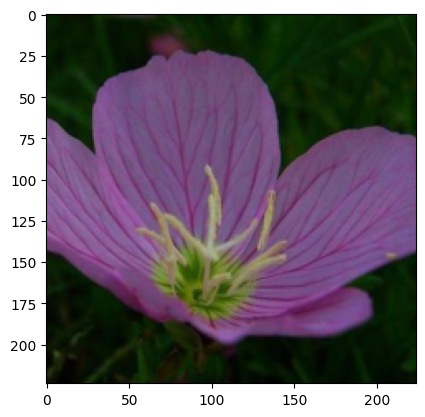

In [45]:
# TODO: Display an image along with the top 5 classes
def imshow(image, ax=None, title=None):
    # Create a new figure and axis if none are provided
    if ax is None:
        fig, ax = plt.subplots()

    # Undo normalization applied during image processing
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])  # Mean for normalization
    std = np.array([0.229, 0.224, 0.225])   # Standard deviation for normalization
    image = std * image + mean  # Denormalize the image
    image = np.clip(image, 0, 1)  # Clip values to [0, 1]

    # Display the image
    ax.imshow(image)

    # Set the title if provided
    if title is not None:
        ax.set_title(title)

    return ax

# TODO: Predict and display the results
image_path = 'flower_data/test/1/image_06752.jpg'  # Specify the image path for prediction
probs, classes = predict(image_path, model)  # Get predicted probabilities and classes

# Process the image for displaying
image = process_image(image_path)

# Show the image with predicted classes
imshow(image)
print(f'Top classes: {classes}')  # Display the top predicted classes
print(f'Top probabilities: {probs}')  # Display the corresponding probabilities
